In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("seaborn-whitegrid")
df = pd.read_csv('bank_marketing_train.csv', index_col=0)
df.head()

C:\Users\loganlv\AppData\Local\Temp\ipykernel_16324\3708223536.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,,,,,,,,,,,,,,,,,,,
72,retired,married,basic.4y,no,no,no,telephone,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,no
30,admin.,single,university.degree,no,yes,no,cellular,aug,tue,1,999,0,nonexistent,-1.7,94.027,-38.3,0.886,4991.6,no
31,unemployed,married,university.degree,no,yes,no,cellular,aug,fri,4,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
37,admin.,married,high.school,no,yes,yes,cellular,nov,mon,1,999,0,nonexistent,-3.4,92.649,-30.1,0.722,5017.5,no
53,unemployed,divorced,basic.9y,unknown,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [11]:
df_clean = df.iloc[:, 1:].loc[(df['previous'] == 0) | ((df['pdays'] != 999) & (df['poutcome'] != 'nonexistent'))]

In [12]:
X = df_clean.copy()
y = X.pop('y')
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
y, _ = y.factorize()
discrete_features = X.dtypes == 'int64'
print(discrete_features)

marital            True
education          True
default            True
housing            True
loan               True
contact            True
month              True
day_of_week        True
campaign           True
pdays              True
previous           True
poutcome           True
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
dtype: bool


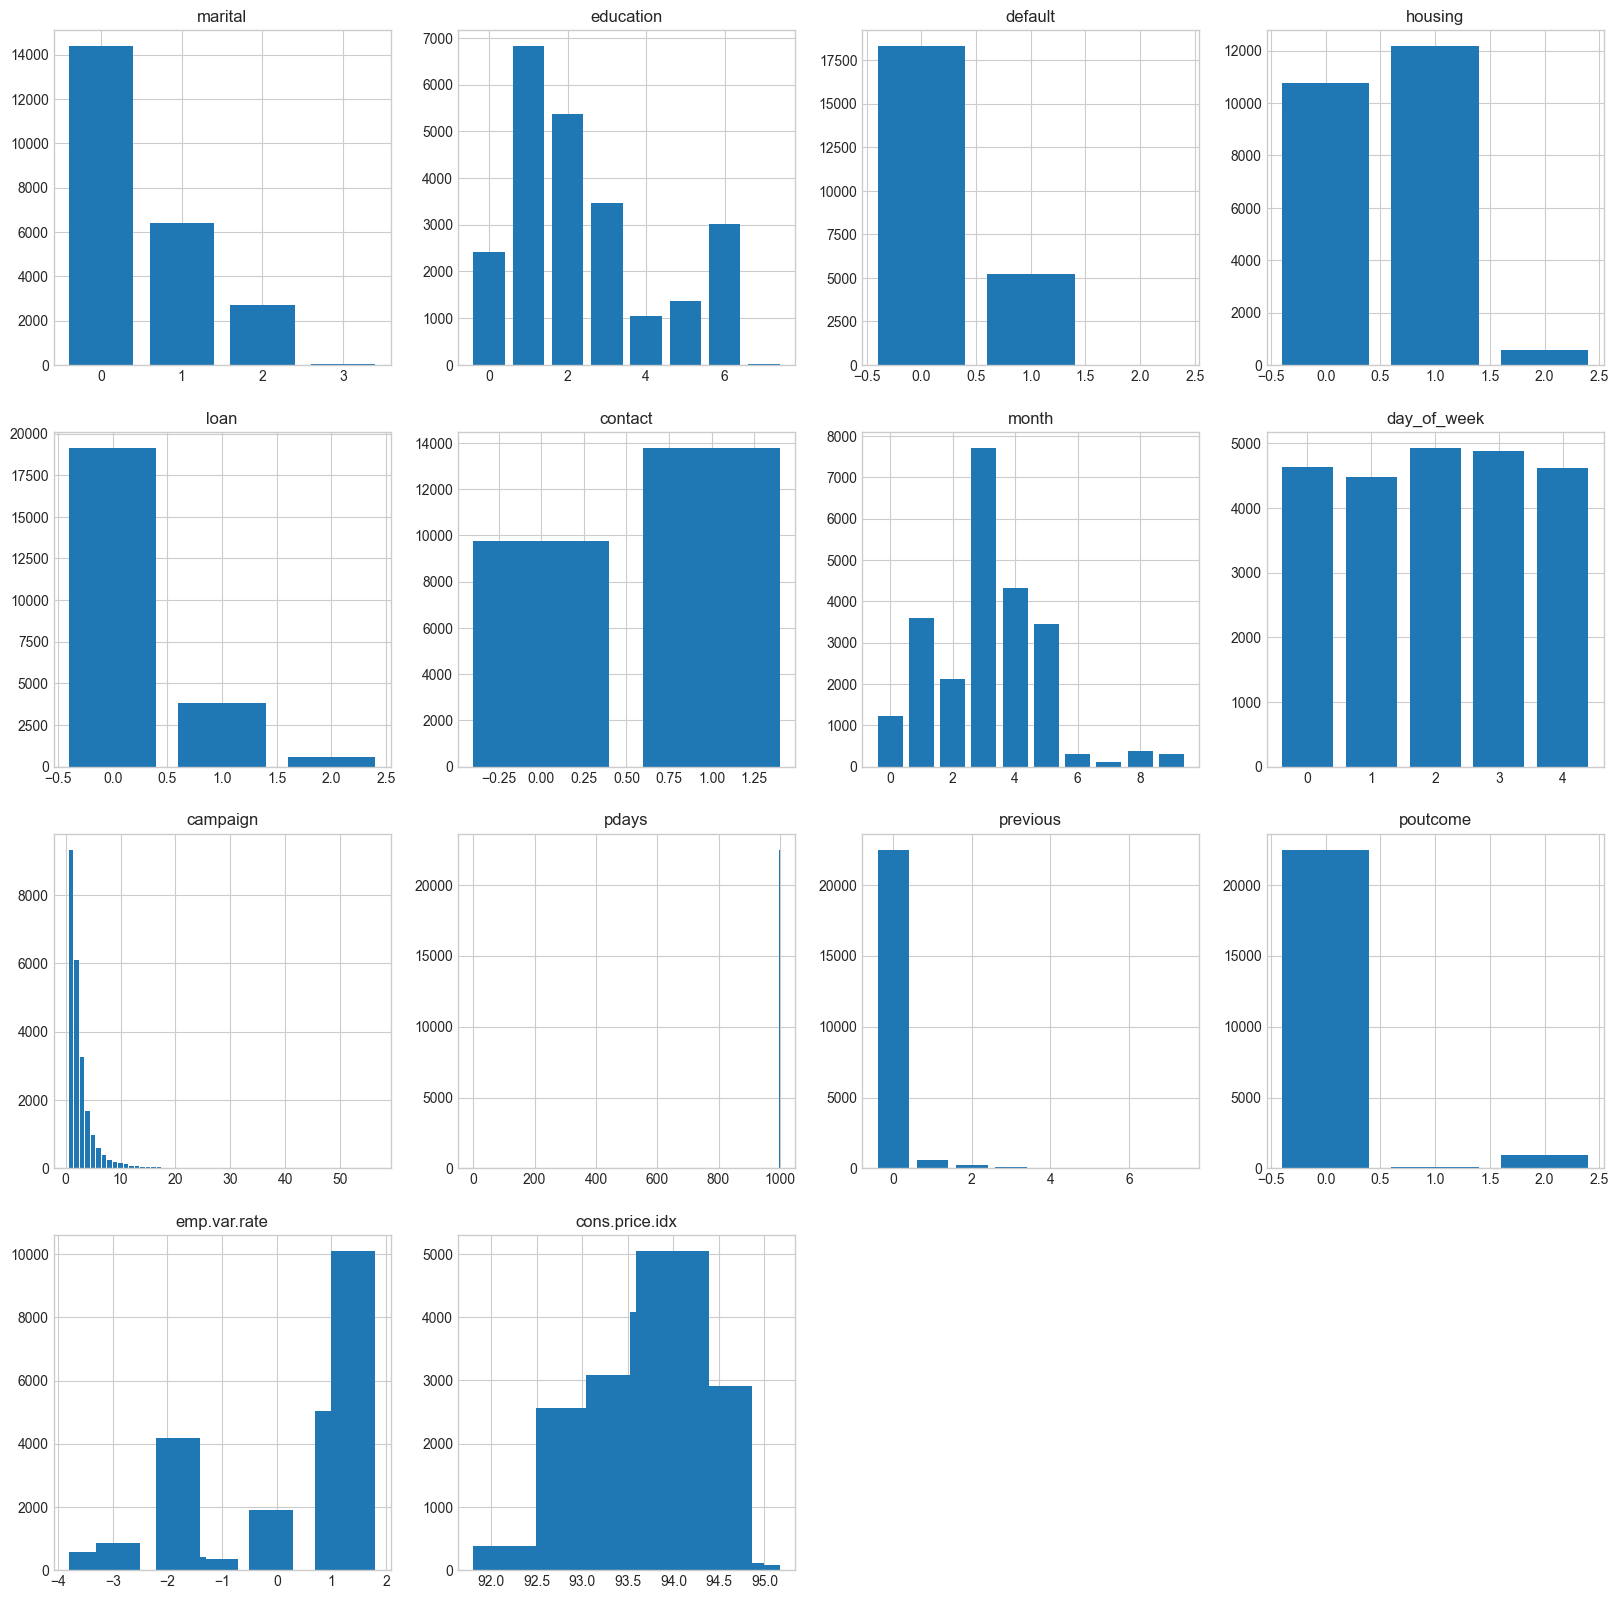

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
X_discrete = X.iloc[:, :14]
plt.figure(figsize=(20, 20))
for i in range(14):
    temp_series = X_discrete.iloc[:, i]
    vc = temp_series.value_counts()
    plt.subplot(4, 4, i+1)
    plt.bar(vc.index, vc.values)
    plt.title(discrete_features.index[i])

In [14]:
from sklearn.feature_selection import mutual_info_regression

# discrete_features = []
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

cons.conf.idx     0.082012
euribor3m         0.079834
cons.price.idx    0.074151
nr.employed       0.070116
emp.var.rate      0.060039
previous          0.038027
poutcome          0.037567
pdays             0.035722
month             0.025518
contact           0.014687
default           0.007965
education         0.006121
marital           0.000672
campaign          0.000578
day_of_week       0.000000
loan              0.000000
housing           0.000000
Name: MI Scores, dtype: float64

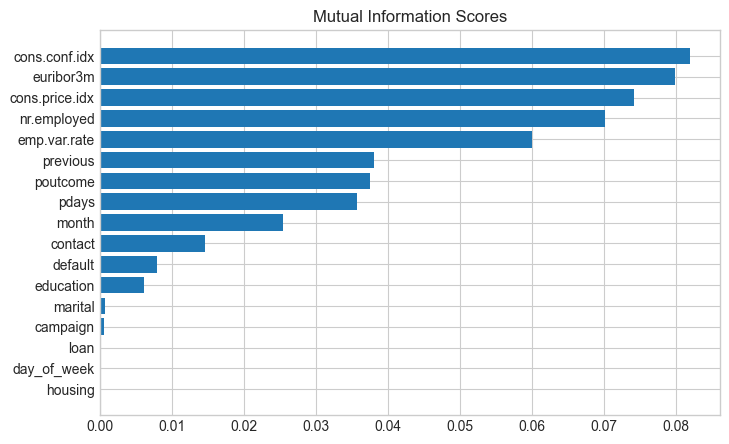

In [15]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [16]:
from sklearn.preprocessing import MinMaxScaler

X = X.drop(['day_of_week'], axis=1)
scaler = MinMaxScaler()
X.iloc[:, -5:] = scaler.fit_transform(X.iloc[:, -5:])
X.head()

,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,,,,,,,,,,,,,,,,
72,0,0,0,0,0,0,0,1,999,0,0,0.333333,0.340608,0.154812,0.185672,0.512287
30,1,1,0,1,0,1,1,1,999,0,0,0.354167,0.711613,0.523013,0.057130,0.105860
31,0,1,0,1,0,1,1,4,999,0,0,1.000000,0.484412,0.615063,0.982090,1.000000
37,0,2,0,1,1,1,2,1,999,0,0,0.000000,0.174591,0.866109,0.019950,0.203781
53,2,3,1,0,0,0,3,2,999,0,0,0.937500,0.698753,0.602510,0.958059,0.859735


In [17]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print(X.shape, y.shape)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(X_res.shape, y_res.shape)
X_res['y'] = y_res
X_res.head()
X_res.to_csv('normalized_train.csv', index=False)

(23533, 16) (23533,)
(41554, 16) (41554,)
